In [1]:
"""
This script comparing the performance of the multi-tissue model to CADD and to random expectations (Fig. 4B).
It is based on the output of the Transfear_Learning_hg37_Multiprossesing_Doc.ipynb script. 
"""

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True


In [2]:
path = os.path.join('..', '..', 'Output', 'Transfer_learning_hg37_ALL_Results_New.csv')
Transfer_Results = pd.read_csv(path, index_col=0)

Transfer_Results.loc[Transfer_Results['Method'] == 'TRACEvar', 'Method'] = 'TRACEvar'
Transfer_Results.loc[Transfer_Results['Method'] == 'Pathogenic_proportion', 'Method'] = 'Expected'

print(Transfer_Results)


                   Tissue    Method    PR_AUC   ROC_AUC
0                    Lung  TRACEvar  0.070042  0.913706
1                    Lung      CADD  0.072014  0.752470
2                    Lung  Expected  0.009313  0.500000
0       Muscle - Skeletal  TRACEvar  0.352356  0.946239
1       Muscle - Skeletal      CADD  0.127834  0.692406
2       Muscle - Skeletal  Expected  0.026056  0.500000
0          Artery - Aorta  TRACEvar  0.034664  0.849618
1          Artery - Aorta      CADD  0.039527  0.736329
2          Artery - Aorta  Expected  0.008607  0.500000
0  Heart - Left Ventricle  TRACEvar  0.396620  0.950666
1  Heart - Left Ventricle      CADD  0.135697  0.695177
2  Heart - Left Ventricle  Expected  0.028631  0.500000
0                   Liver  TRACEvar  0.067540  0.937892
1                   Liver      CADD  0.034046  0.730302
2                   Liver  Expected  0.007121  0.500000
0          Nerve - Tibial  TRACEvar  0.046187  0.759987
1          Nerve - Tibial      CADD  0.031984  0

['Lung', 'Muscle - Skeletal', 'Artery - Aorta', 'Heart - Left Ventricle', 'Liver', 'Nerve - Tibial', 'Skin - Not Sun Exposed', 'Pituitary', 'Ovary', 'Testis', 'Whole Blood', 'brain']
relevant_tissues 12 ['Lung', 'Muscle - Skeletal', 'Artery - Aorta', 'Heart - Left Ventricle', 'Liver', 'Nerve - Tibial', 'Skin - Not Sun Exposed', 'Pituitary', 'Ovary', 'Testis', 'Whole Blood', 'brain']


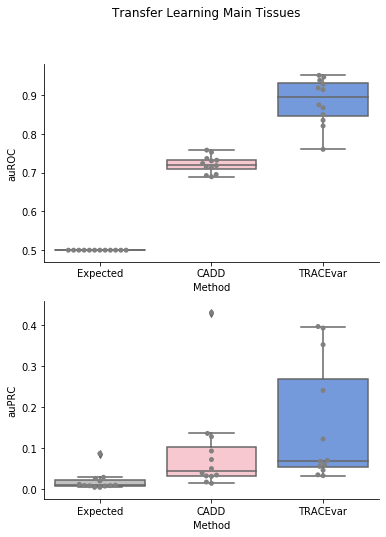

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))
tissues = Transfer_Results['Tissue'].unique().tolist()
print(tissues)
relevant_tissues = ['Lung', 'Muscle - Skeletal',  'Artery - Aorta', 'Heart - Left Ventricle',  'Liver', 'Nerve - Tibial',   'Skin - Not Sun Exposed',  'Pituitary', 'Ovary',  'Testis', 'Whole Blood', 'brain']
print('relevant_tissues', len(relevant_tissues), relevant_tissues)

order=['Expected', 'CADD', 'TRACEvar']
Transfer_Results.rename(columns={"PR_AUC":'auPRC', 'ROC_AUC':'auROC'}, inplace=True)
sns.boxplot(x="Method", y="auPRC", data=Transfer_Results[Transfer_Results['Tissue'].isin(relevant_tissues)], palette=[ 'silver', 'pink', 'cornflowerblue'],  ax=ax2, order=order) #ROC_AUC, PR_AUC,
sns.swarmplot(x="Method", y="auPRC", data=Transfer_Results[Transfer_Results['Tissue'].isin(relevant_tissues)], color='gray',  ax=ax2, order=order)

sns.boxplot(x="Method", y="auROC", data=Transfer_Results[Transfer_Results['Tissue'].isin(relevant_tissues)], palette=['silver', 'pink', 'cornflowerblue'],  ax=ax1, order=order) #ROC_AUC, PR_AUC,
sns.swarmplot(x="Method", y="auROC", data=Transfer_Results[Transfer_Results['Tissue'].isin(relevant_tissues)], color='gray',  ax=ax1 , order=order)

fig.suptitle('Transfer Learning Main Tissues')

path = os.path.join('..', '..', 'Output', 'Transfer_learning_hg37_ALL_Results_New.pdf')
plt.savefig(path)


In [4]:
print(Transfer_Results['auROC'][Transfer_Results['Method'] == 'TRACEvar'].median())
print(Transfer_Results['auPRC'][Transfer_Results['Method'] == 'TRACEvar'].median())

0.8942404683247571
0.0687912184058255


In [5]:
import scipy.stats as sts

tl_performance = Transfer_Results['auROC'][Transfer_Results['Method'] == 'TRACEvar']
cadd_performance = Transfer_Results['auROC'][Transfer_Results['Method'] == 'CADD']

test_results = sts.mannwhitneyu(tl_performance, cadd_performance, alternative='greater')
print(test_results)

MannwhitneyuResult(statistic=144.0, pvalue=1.82922767694855e-05)
